In [ ]:
from utils import *

In [347]:
import sqlite3
import pandas as pd
connection = sqlite3.connect('contracts_found.db')

# SQL query
query = "SELECT * FROM contracts_found"

# Reading the SQL query into a DataFrame
len(pd.read_sql_query(query, connection))

865

In [245]:
import sqlite3
import pandas as pd
connection = sqlite3.connect('contracts_found.db')

# SQL query
query = "SELECT * FROM contracts_found"

# Reading the SQL query into a DataFrame
contracts_found = pd.read_sql_query(query, connection)
print(len(contracts_found))
contracts_found

431


,Unnamed: 0,index,Name,Ticker,Contract
0,0.0,0.0,Magic Ethereum Chat,MEC,0x85abF69827Ee11a6e277E5694Be56c3489F2bE74
1,1.0,1.0,Pepewifhat,PWIF,0x216463D71EAA305872fB97FBd40559CaEce39749
2,2.0,2.0,MrBacon,BACON,0x7158a076d13c086FDa65e827AE2CB81D6e2354e9
3,3.0,3.0,MrBacon,BACON,0x4067d0a72ddb003249B0bc2312D86415bCCe2e89
4,4.0,4.0,Myria,MRY,0xfb73198c67C54Fb8fc88F32B6086F504479A5b50
...,...,...,...,...,...
426,NaN,NaN,Krick Coin,KRICK,0x4F0E058C5e8895d576390eA0b8E351F063b34f81
427,NaN,NaN,Founder,FNDR,0x155aB13F7c552C5a0856A4b67637D4b0bB456330
428,NaN,NaN,Enter the AI,ETHAI,0x8Efe43aD583aFCC2C76Efa2bD40233114C78636B
429,NaN,NaN,PepeTimes,PEPETIMES,0x481d9D3fF5E891d97f9070345470F8dD91D7f3F3


In [246]:
sl_objects = dict()

In [249]:
if contracts_found.loc[1, 'success'] ==1:
    print('sdfds')
if 'Unknown language: unknown' in str(contracts_found.loc[1, 'error']) or 'Symbol not found:' in str(contracts_found.loc[1, 'error']):
    print('fsdfcddd')

sdfds


In [252]:
contracts_found['error'] = np.nan
contracts_found['success'] = np.nan

In [257]:
import numpy as np

for i in range(len(contracts_found)):
    if contracts_found.loc[i, 'success'] ==1:
        continue
    if 'Unknown language: unknown' in str(contracts_found.loc[i, 'error']) or 'Symbol not found:' in str(contracts_found.loc[i, 'error']):
        continue
        
    import time
    
    try:
                
        contract_address = contracts_found['Contract'][i]
        print(contract_address)
        sl = Slither(contract_address, etherscan_api_key = 'J54BEV9S8I4B26KU9BV98G6H3ASJRJ7IG7')
        contracts_found.loc[i, 'success'] = 1
        sl_objects[contract_address] = sl
        time.sleep(2)
        print(1)
    except Exception as e:
        print(e)
        
        contracts_found.loc[i, 'success'] = 0
        contracts_found.loc[i, 'error'] = e
        time.sleep(2)


0xC6D387604Cbb6840224b26f6afCBE62a3461d259
Invalid compilation: 
Invalid solc compilation 
0xE16e6a5c25AE93E70C62C200c2c105082E767efd
Invalid compilation: 
Invalid solc compilation Traceback (most recent call last):
  File "/usr/local/bin/solc", line 8, in <module>
    sys.exit(solc())
             ^^^^^^
  File "/usr/local/Cellar/solc-select/1.0.4_2/libexec/lib/python3.12/site-packages/solc_select/__main__.py", line 94, in solc
    subprocess.run(
  File "/usr/local/Cellar/python@3.12/3.12.3/Frameworks/Python.framework/Versions/3.12/lib/python3.12/subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/Cellar/python@3.12/3.12.3/Frameworks/Python.framework/Versions/3.12/lib/python3.12/subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "/usr/local/Cellar/python@3.12/3.12.3/Frameworks/Python.framework/Versions/3.12/lib/python3.12/subprocess.py", li

KeyboardInterrupt: 

In [263]:
contracts_found[contracts_found.success == 0].error.value_counts()

error
Unknown language: unknown                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [255]:
contracts_found.to_csv("contracts_found.csv")

In [256]:
verified_contracts = contracts_found[contracts_found['success'] ==1].reset_index(drop=True)
verified_contracts

,Unnamed: 0,index,Name,Ticker,Contract,error,success
0,1.0,1.0,Pepewifhat,PWIF,0x216463D71EAA305872fB97FBd40559CaEce39749,NaN,1.0
1,8.0,10.0,PepeTrump,PepeTrump,0xa5f6182455A381ddcfc2eaF3984EfeEB95017627,NaN,1.0
2,9.0,11.0,KANSHA,KSH,0x625933f04eb04f33Ac489c952854165C7cc4A2fd,NaN,1.0
3,10.0,12.0,Miltzn Home,MH,0xb8D44feCbAC44eA6Ea25D5480e0a902548870ed1,NaN,1.0
4,19.0,21.0,KUMATAMA Only One Collection,koc,0x1EB3Add1D2B0B047766b6978303Be52F60bec2f9,NaN,1.0
...,...,...,...,...,...,...,...
117,NaN,NaN,Blendr Network,BLENDR,0x84018071282d4B2996272659D9C01cB08DD7327F,NaN,1.0
118,NaN,NaN,Krick Coin,KRICK,0x4F0E058C5e8895d576390eA0b8E351F063b34f81,NaN,1.0
119,NaN,NaN,Founder,FNDR,0x155aB13F7c552C5a0856A4b67637D4b0bB456330,NaN,1.0
120,NaN,NaN,PepeTimes,PEPETIMES,0x481d9D3fF5E891d97f9070345470F8dD91D7f3F3,NaN,1.0


In [259]:
contracts_found[(contracts_found.error.astype(str) !='Unknown language: unknown')&(contracts_found.error.astype(str) !='Symbol')].success.value_counts()

success
0.0    232
1.0    122
Name: count, dtype: int64

In [33]:
compilation_unit = sl.compilation_units[0]
# Print all the contracts from the USDT address
print([str(c) for c in compilation_unit.contracts])
# Print the most derived contracts from the USDT address
print([str(c) for c in compilation_unit.contracts_derived])

['IERC20', 'Context', 'Ownable', 'SafeMath', 'BaseToken', 'StandardToken']
['SafeMath', 'StandardToken']


In [ ]:
compilation_unit = sl.compilation_units[0]
# Print all the contracts from the USDT address
print([str(c) for c in compilation_unit.contracts])
# Print the most derived contracts from the USDT address
print([str(c) for c in compilation_unit.contracts_derived])

In [219]:
contracts_found = pd.read_csv("contracts slither check.csv")

In [224]:

get_monthly_prices_for_a_token("0xDe82d78d284543454a39137092D79BaC8A6341A9".lower())

{'data': {'ethereum': {'dexTrades': None}}, 'errors': [{'message': 'Failed to find token 0xde82d78d284543454a39137092d79bac8a6341a9 in Ethereum Mainnet', 'locations': [{'line': 4, 'column': 13}], 'path': ['ethereum', 'dexTrades'], 'error_type': 'client', 'query_id': 'iXHzVvNu34oRHGxq'}]}


<Response [200]>

In [266]:
import numpy as np
verified_contracts['max_price_in_eth'] =np.nan
for i in range(len(verified_contracts)):
    if pd.notnull(verified_contracts.loc[i, 'max_price_in_eth']):
        continue

    token_contract_address_token = verified_contracts['Contract'].values[i]

    response = get_monthly_prices_for_a_token(token_contract_address_token)
    
    try:
        if len(response.json()['data']['ethereum']['dexTrades']) == 0:
            max_price_in_eth = 0
        else:
            max_price_in_eth = response.json()['data']['ethereum']['dexTrades'][0]['maximum_price']

    except:
        print('error getting prices for', token_contract_address_token)
        # this seems to happen infrequently for some tokens that didnt make it to a pool
        # Example: https://etherscan.io/token/0xDe82d78d284543454a39137092D79BaC8A6341A9
        max_price_in_eth = 0

    try:
        token_supply = get_supply(token_contract_address_token)
    except:
        token_supply = 0

    max_market_cap_in_eth = token_supply*max_price_in_eth
    
    verified_contracts.loc[i, 'max_price_in_eth'] = max_price_in_eth
    verified_contracts.loc[i, 'token_supply'] = token_supply
    verified_contracts.loc[i, 'max_market_cap_in_eth'] = max_market_cap_in_eth
    print(token_contract_address_token, max_price_in_eth, token_supply, max_market_cap_in_eth)

{'data': {'ethereum': {'dexTrades': []}}}
Total Supply: 1000000000.0
0x216463D71EAA305872fB97FBd40559CaEce39749 0 1000000000.0 0.0
{'data': {'ethereum': {'dexTrades': [{'timeInterval': {'month': '2024-03-01'}, 'buyCurrency': {'symbol': 'PepeTrump', 'address': '0xa5f6182455a381ddcfc2eaf3984efeeb95017627'}, 'buyAmount': 854239873926.3235, 'sellCurrency': {'symbol': 'WETH', 'address': '0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2'}, 'sellAmount': 4.798477786990575, 'trades': 101, 'maximum_price': 1.2223440476219541e-11, 'minimum_price': 1.7366297818969466e-12, 'open_price': '1.1151459093540261e-11', 'close_price': '1.7718921622970446e-12'}]}}}
Total Supply: 1000000000000.0
0xa5f6182455A381ddcfc2eaF3984EfeEB95017627 1.2223440476219541e-11 1000000000000.0 12.22344047621954
{'data': {'ethereum': {'dexTrades': [{'timeInterval': {'month': '2024-03-01'}, 'buyCurrency': {'symbol': 'KSH', 'address': '0x625933f04eb04f33ac489c952854165c7cc4a2fd'}, 'buyAmount': 151751794.0579154, 'sellCurrency': {'sym

<Axes: >

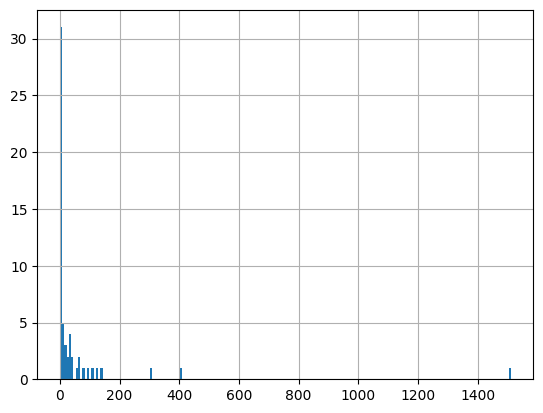

In [293]:
verified_contracts[(verified_contracts.max_market_cap_in_eth>0)&(verified_contracts.max_market_cap_in_eth<10000)].max_market_cap_in_eth.hist(bins=200)

In [297]:
(verified_contracts[(verified_contracts.max_market_cap_in_eth>0)&(verified_contracts.max_market_cap_in_eth<10000)].max_market_cap_in_eth*3500).astype(int).sort_values()
# .hist(bins=200)

120          0
84           0
77           0
116          0
86           0
88           0
91           0
60           0
99           0
56           0
53           0
82           0
34           0
47           0
26           0
115          0
6            0
111          0
110          0
30           0
105          0
80           0
22           0
24           0
102          0
21           0
97        4206
87        6396
42        9312
65        9377
73       14355
113      31587
104      33596
1        42782
89       48164
90       48164
14       63731
78       78912
23       78912
63       87500
72       91244
59      110675
58      110675
15      125097
108     125097
20      135734
76      135734
103     194973
25      222573
79      222573
96      277752
66      331513
7       384373
92      436103
67      488452
94     1081510
2      1408250
83     5288286
Name: max_market_cap_in_eth, dtype: int64

In [302]:
verified_contracts['max_market_cap_in_eth'] = verified_contracts.max_market_cap_in_eth.astype(int)

In [303]:
verified_contracts['max_market_cap_in_eth'].value_counts()

max_market_cap_in_eth
0           88
9            2
35           2
38           2
22           2
63           2
2            2
31           2
13           2
1            2
4            1
55           1
79           1
309          1
124          1
1510         1
94           1
26           1
139          1
12           1
25           1
11233934     1
18           1
109          1
402          1
53485        1
Name: count, dtype: int64

In [314]:
pd.Series([str(c) for c in compilation_unit.contracts]).sort_values()

0                Address
3                Context
4                  ERC20
1                 IERC20
2         IERC20Metadata
6           IERC20Permit
14                  IFee
13      IUniswapV2Caller
9      IUniswapV2Factory
10        IUniswapV2Pair
11    IUniswapV2Router01
12    IUniswapV2Router02
8                   Math
5                Ownable
7              SafeERC20
15         StandardToken
dtype: object

In [326]:
def get_number_funtions(contract_address):
    compilation_unit = sl_objects[contract_address].compilation_units[0]
    return len(pd.Series([str(c) for c in compilation_unit.contracts]))

verified_contracts["get_number_funtions"] = verified_contracts.Contract.apply(get_number_funtions)


In [329]:
verified_contracts[["max_market_cap_in_eth", "get_number_funtions"]].corr()

,max_market_cap_in_eth,get_number_funtions
max_market_cap_in_eth,1.000000,0.120392
get_number_funtions,0.120392,1.000000


In [343]:
verified_contracts[verified_contracts.max_market_cap_in_eth >0][["max_market_cap_in_eth", "get_number_funtions"]].corr()

,max_market_cap_in_eth,get_number_funtions
max_market_cap_in_eth,1.00000,0.46034
get_number_funtions,0.46034,1.00000


In [346]:
verified_contracts[verified_contracts.max_market_cap_in_eth >0]

,Unnamed: 0,index,Name,Ticker,Contract,error,success,max_price_in_eth,token_supply,max_market_cap_in_eth,get_number_funtions
1,8.0,10.0,PepeTrump,PepeTrump,0xa5f6182455A381ddcfc2eaF3984EfeEB95017627,NaN,1.0,0,1.000000e+12,12,13
2,9.0,11.0,KANSHA,KSH,0x625933f04eb04f33Ac489c952854165C7cc4A2fd,NaN,1.0,0,1.000000e+09,402,9
7,24.0,27.0,Avalon AI,AVA,0x41EbBaDCA18B831167A9E7c2044d2fF804644435,NaN,1.0,0,1.000000e+08,109,7
14,36.0,39.0,KOA,KOA,0x9C9747FCC731f8B665BeC6f0467C88604d671Ac9,NaN,1.0,0,1.000000e+09,18,13
15,NaN,NaN,Magic GPT,MGPT,0x738FDdc4108C714A1e100993Dbab35C05839bd35,NaN,1.0,0,1.000000e+08,35,7
20,NaN,NaN,Automak,ATOM,0x1b75C32Ade437BD70dA7162Ed2dBa1b1DC156430,NaN,1.0,0,1.000000e+08,38,7
23,NaN,NaN,Corphix AI,CORPHIX,0x5Eaf5acB2bba16F6EB93999EEB44e6211Ac8818a,NaN,1.0,0,1.000000e+06,22,10
25,NaN,NaN,Pog Coin 2,POG,0xF875c423F210E0dBBB0FE9801608236412eBB8dF,NaN,1.0,0,1.000000e+09,63,7
42,NaN,NaN,EeBe Train,EBTRAIN,0xf51f4bfd6fcC385Bc37Eb84432520b7B0e75A8B9,NaN,1.0,0,1.000000e+06,2,12
57,NaN,NaN,Shido,SHIDO,0x046556644d0D0bA3a91C5F42d83F6883b180FaF8,NaN,1.0,0,1.800000e+10,11233934,16


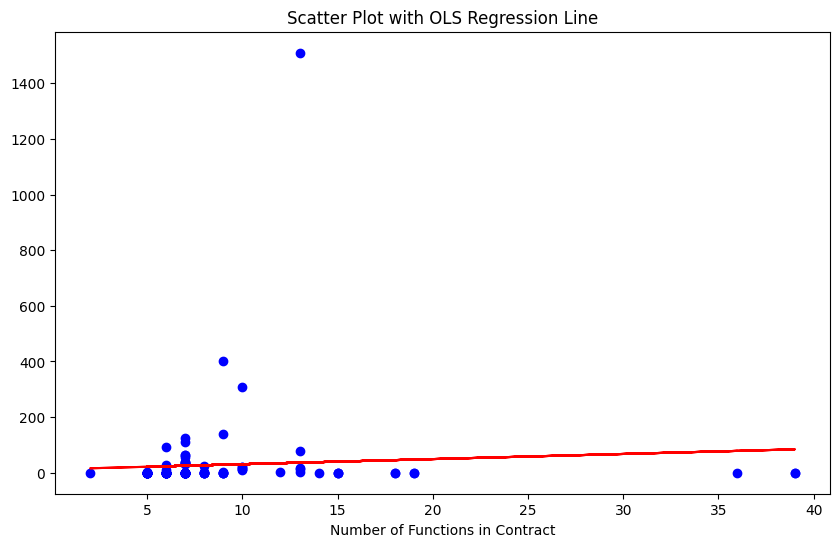

In [339]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Simulating data for demonstration
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(verified_contracts[verified_contracts.max_market_cap_in_eth <53485]['get_number_funtions'], verified_contracts[verified_contracts.max_market_cap_in_eth <53485]['max_market_cap_in_eth'], color='blue', label='Data Points')

# Linear Regression using OLS
X = sm.add_constant(verified_contracts[verified_contracts.max_market_cap_in_eth <53485]['get_number_funtions'])  # adding a constant
model = sm.OLS(verified_contracts[verified_contracts.max_market_cap_in_eth <53485]['max_market_cap_in_eth'], X).fit()
predictions = model.predict(X)

# Adding the regression line to the plot
plt.plot(verified_contracts[verified_contracts.max_market_cap_in_eth <53485]['get_number_funtions'], predictions, color='red', label='OLS Regression Line')
plt.title('Scatter Plot with OLS Regression Line')
plt.xlabel('Number of Functions in Contract')
plt.show()


In [348]:
contract_address = verified_contracts.sort_values(by = 'max_market_cap_in_eth', ascending=False)['Contract'].values[0]
compilation_unit = sl_objects[contract_address].compilation_units[0]
print(contract_address)
pd.Series([str(c) for c in compilation_unit.contracts]).sort_values()

0x046556644d0D0bA3a91C5F42d83F6883b180FaF8


0                Address
3                Context
4                  ERC20
1                 IERC20
2         IERC20Metadata
6           IERC20Permit
14                  IFee
13      IUniswapV2Caller
9      IUniswapV2Factory
10        IUniswapV2Pair
11    IUniswapV2Router01
12    IUniswapV2Router02
8                   Math
5                Ownable
7              SafeERC20
15         StandardToken
dtype: object

In [311]:
compilation_unit = sl_objects[verified_contracts.sort_values(by = 'max_market_cap_in_eth', ascending=False)['Contract'].values[1]].compilation_units[0]
print([str(c) for c in compilation_unit.contracts])


['Context', 'Ownable', 'IERC20', 'SafeMath', 'IUniswapV2Factory', 'IUniswapV2Pair', 'IUniswapV2Router01', 'IUniswapV2Router02', 'IERC20Metadata', 'ERC20', 'Unknown']


<Axes: >

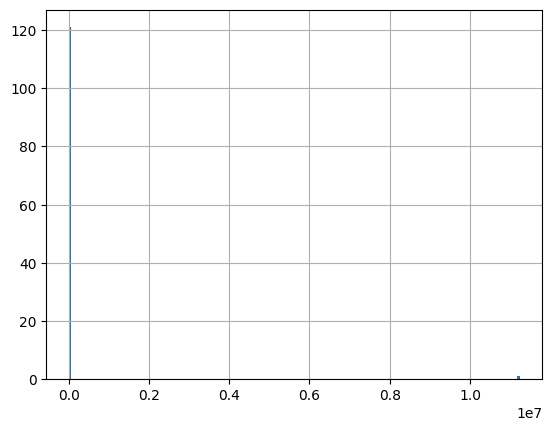

In [306]:
verified_contracts.max_market_cap_in_eth.hist(bins=200)